In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [103]:
# Save Files 

# Data Path 

data = '../data/'

# Historical Data 

historical_path = data+'historical.pickle'

In [104]:
df = pd.read_pickle(historical_path)
df.head(5)

,date,underlying_price,current_index,current_mark,index,mark,current_implied_funding_value,daily_funding_value,current_implied_volatility_value,daily_implied_volatility_value,normalization_factor,oSQTH_price,delta,gamma,vega,volume_osqth,volume_usd
0,2022-02-27 00:00:00,2775.28,7702168.34,8137166.90,7787355.61,8212370.48,0.314,0.304,107.05,105.28,0.828,673.86,0.486,0.000175,0.000249,NaN,NaN
1,2022-02-27 00:05:00,2774.40,7702168.34,8137253.94,7787355.61,8212458.33,0.314,0.304,107.06,105.29,0.828,673.65,0.485,0.000175,0.000249,NaN,NaN
2,2022-02-27 00:10:00,2777.74,7720674.82,8147107.71,7787355.61,8212542.69,0.307,0.304,105.89,105.30,0.828,674.46,0.485,0.000175,0.000246,NaN,NaN
3,2022-02-27 00:15:00,2777.97,7737678.15,8156164.51,7787355.61,8212633.82,0.301,0.304,104.81,105.31,0.828,674.52,0.485,0.000175,0.000244,NaN,NaN
4,2022-02-27 00:20:00,2782.57,7737678.15,8156249.01,7787355.61,8212718.91,0.301,0.304,104.82,105.32,0.828,675.63,0.486,0.000175,0.000244,NaN,NaN


In [105]:
df['vega'][3000:4000]

3000     0.000195
3001     0.000193
3002     0.000193
3003     0.000193
3004     0.000193
          ...    
3995    60.570000
3996    59.990000
3997    59.980000
3998    59.960000
3999    59.940000
Name: vega, Length: 1000, dtype: float64

Text(0.5, 0, 'Time')

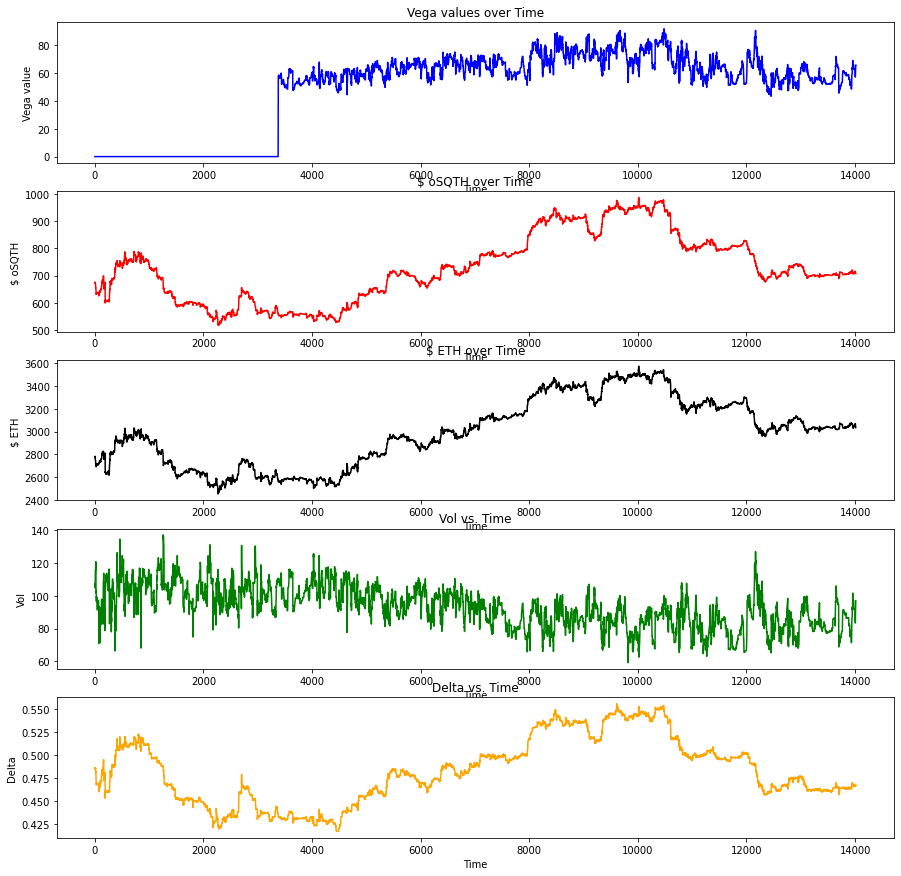

In [106]:
fig, axes = plt.subplots(nrows=5,sharex=False,figsize=(15,15))
axes[0].set_title('Vega values over Time')
axes[0].plot(df.index, df['vega'], color='Blue')
axes[0].set_ylabel('Vega value')
axes[0].set_xlabel('Time')
axes[1].plot(df.index, df['oSQTH_price'], color='red')
axes[1].set_title('$ oSQTH over Time')
axes[1].set_ylabel('$ oSQTH ')
axes[1].set_xlabel('Time')
axes[2].plot(df.index, df['underlying_price'], color='black')
axes[2].set_title('$ ETH over Time')
axes[2].set_ylabel('$ ETH ')
axes[2].set_xlabel('Time')
axes[3].plot(df.index, df['current_implied_volatility_value'], color='green')
axes[3].set_title('Vol vs. Time')
axes[3].set_ylabel('Vol')
axes[3].set_xlabel('Time')
axes[4].plot(df.index, df['delta'], color='orange')
axes[4].set_title('Delta vs. Time')
axes[4].set_ylabel('Delta')
axes[4].set_xlabel('Time')

In [107]:
#Functions 

def u_prob(v): 
    return ((1-np.exp(-v))/(np.exp(v)-np.exp(-v)))

def d_prob(v): 
    return 1-((1-np.exp(-v))/(np.exp(v)-np.exp(-v)))

def pres_value(eth,v): 
    return eth**2*(u_prob(v)*np.exp(v)+d_prob(v)*np.exp(-v))

def norecusion_presvalue(eth,iv,f):
    return eth**2*(1/(2*np.exp(-f*iv**2)-1))

In [108]:
# Constants 

funding_period = 17.5/365 

period = 17.5 

funding_freq = 1/period

iv = df.loc[0,'current_implied_volatility_value'] # implied volatility 
iv = (iv/100)/period

# funding = df.loc[0,'daily_funding_value']/funding_period

eth_price = df.loc[0,'underlying_price'] #underlying price 

current_mark = df.loc[0,'current_mark'] #current market mark price (by AMM)

In [109]:
squeeth_implied = norecusion_presvalue(eth_price, iv, funding_period)
squeeth_implied

7704943.49139777

In [110]:
current_mark-squeeth_implied

432223.40860223025

In [111]:
# Do it recursively 


# Try APO way 

index = eth_price**2*np.exp(iv**2)
mark = index*(1+iv)

print(index)
print(mark)

7731054.189501224
8203973.818636143


In [112]:
# Use this function 
# https://colab.research.google.com/drive/1HTM_2j0jmda9tzN_uskBPz9Rpma8Lp3C#scrollTo=OINUuihj92NN

# And do some plotting regarding fixed and non-fixed 

df[df['daily_implied_volatility_value']<100]

,date,underlying_price,current_index,current_mark,index,mark,current_implied_funding_value,daily_funding_value,current_implied_volatility_value,daily_implied_volatility_value,normalization_factor,oSQTH_price,delta,gamma,vega,volume_osqth,volume_usd
144,2022-02-27 12:00:00,2822.02,7973313.58,8286745.51,7654565.00,8028991.20,0.220,0.273,89.68,99.80,0.827,684.99,0.485,0.000172,0.000209,NaN,NaN
145,2022-02-27 12:05:00,2822.03,7973313.58,8286808.21,7654565.00,8029051.95,0.220,0.273,89.69,99.81,0.827,684.99,0.485,0.000172,0.000209,NaN,NaN
146,2022-02-27 12:10:00,2821.94,7973313.58,8286884.24,7656095.99,8029928.53,0.220,0.272,89.70,99.72,0.827,684.97,0.485,0.000172,0.000209,NaN,NaN
147,2022-02-27 12:15:00,2819.96,7947841.02,8273695.47,7657627.28,8030788.77,0.230,0.272,91.55,99.62,0.827,684.49,0.486,0.000172,0.000213,NaN,NaN
148,2022-02-27 12:20:00,2812.37,7908202.98,8178341.11,7659158.89,8031652.01,0.192,0.271,83.70,99.52,0.827,676.49,0.481,0.000171,0.000193,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14009,2022-04-17 23:00:00,3045.92,9289572.39,9677176.66,9330534.51,9699458.67,0.234,0.222,92.34,89.93,0.735,709.70,0.466,0.000153,62.870000,700.0,498923.0
14010,2022-04-17 23:05:00,3040.23,9246940.62,9655006.21,9330534.51,9699519.31,0.247,0.222,94.90,89.94,0.735,708.37,0.466,0.000153,64.530000,699.0,498106.0
14011,2022-04-17 23:10:00,3036.84,9222931.00,9642558.02,9328668.69,9698644.55,0.254,0.222,96.33,90.07,0.735,707.58,0.467,0.000154,65.440000,697.0,496469.0
14012,2022-04-17 23:15:00,3036.80,9213713.14,9637816.23,9324938.15,9696783.63,0.257,0.223,96.88,90.31,0.735,707.57,0.467,0.000154,65.840000,697.0,496469.0
